In [4]:
#2
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)

In [5]:
#2
import numpy as np
int64_bool = df.apply(lambda x: (True if x.dtype == np.int64 else False),axis = 0)
df = df[df.columns[int64_bool]]


C:\Users\Oscar Paredez\AppData\Local\Temp\ipykernel_18780\938917052.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(eliminate, 1, inplace=True)


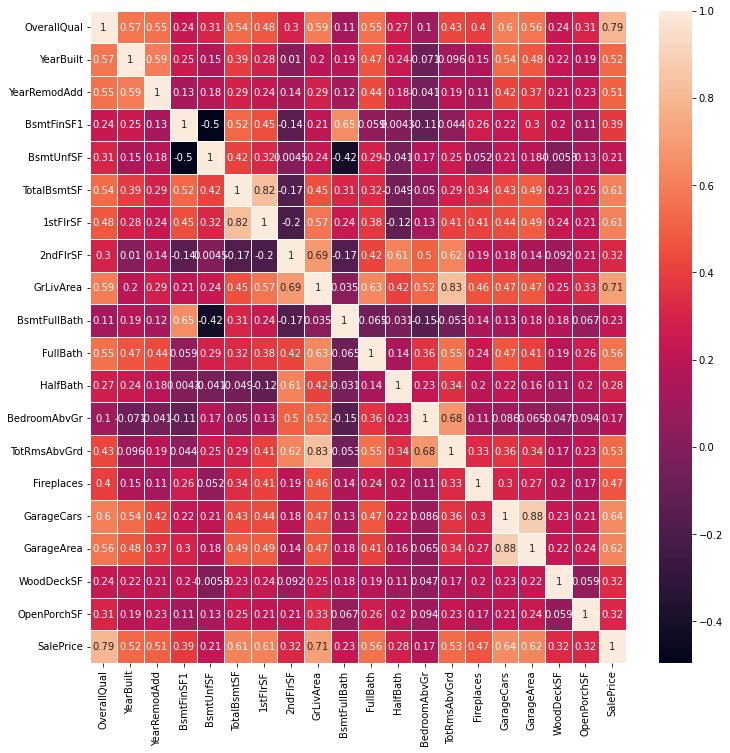

In [6]:
#2
import matplotlib.pyplot as plt

eliminate = ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
df.drop(eliminate, 1, inplace=True)
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

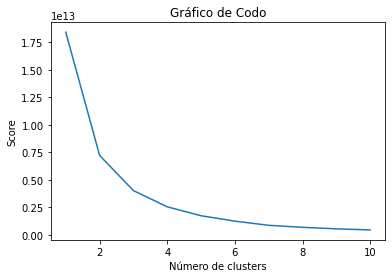

In [7]:
#3
import pyclustertend
import sklearn.cluster as cluster
df.dropna()
dfarray = df[['SalePrice', 'SalePrice']].values
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(dfarray)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Score")
plt.title("Gráfico de Codo")
plt.show()



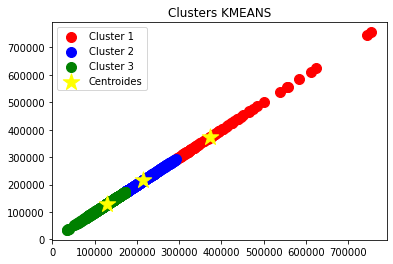

In [8]:
#3
km = cluster.KMeans(n_clusters=3).fit(dfarray)
centroides = km.cluster_centers_
especies = km.predict(dfarray)
plt.scatter(dfarray[especies == 0, 0], dfarray[especies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(dfarray[especies == 1, 0], dfarray[especies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(dfarray[especies == 2, 0], dfarray[especies == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Clusters KMEANS")
plt.legend()
plt.show()

# Cluster 1 (Economicas): 35,000 - 150,000
# Cluster 2 (Intermedias): 150,000 - 250,000
# Cluster 3 (Caras): 240,000 - 750,000
# Aproximadamente



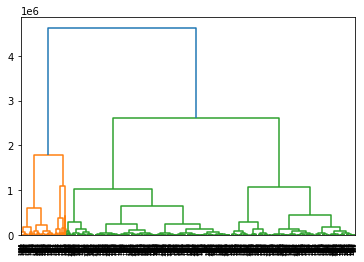

In [9]:
#3
import scipy.cluster.hierarchy as sch
dendograma = sch.dendrogram(sch.linkage(dfarray[0:2500][:], method='ward'))

In [10]:
# Numero 4
minPrice = df['SalePrice'].min()
maxPrice = df['SalePrice'].max()
avg = (maxPrice - minPrice) / 3
df['Clasificacion'] = df['SalePrice']

df['Clasificacion'][df['SalePrice'] < minPrice + avg] = 0
df['Clasificacion'][df['SalePrice'] >= minPrice + avg] = 1
df['Clasificacion'][df['SalePrice'] >= minPrice + avg * 2] = 2
df

,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Clasificacion
0,7,2003,2003,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,208500,0
1,6,1976,1976,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,181500,0
2,7,2001,2002,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,223500,0
3,7,1915,1970,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,140000,0
4,8,2000,2000,655,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,250000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0,953,953,953,694,1647,0,2,1,3,7,1,2,460,0,40,175000,0
1456,6,1978,1988,790,589,1542,2073,0,2073,1,2,0,3,7,2,2,500,349,0,210000,0
1457,7,1941,2006,275,877,1152,1188,1152,2340,0,2,0,4,9,2,1,252,0,60,266500,0
1458,5,1950,1996,49,0,1078,1078,0,1078,1,1,0,2,5,0,1,240,366,0,142125,0


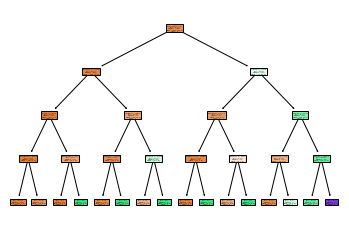

In [11]:
# Numero 5 y 6
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import random
df = df.drop('SalePrice', axis = 1)
df['Clasificacion'] = df['Clasificacion'].astype('category')
Y = df.pop('Clasificacion')  #La variable respuesta

X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7)
# y_train
# X_train
arbol = DecisionTreeClassifier(max_depth=4, random_state=42) 
arbol = arbol.fit(X_train, y_train) 

tree.plot_tree(arbol,feature_names=df.columns, class_names=['0','1','2'], filled=True)
plt.savefig('DesicionTreeClassifier.pdf')

In [12]:
#6
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred = arbol.predict(X_test)
print("Accuracy Desicion Tree Classifier:", metrics.accuracy_score(y_test, y_pred))
print("Precision Desicion Tree Classifier:", metrics.precision_score(
    y_test, y_pred, average='weighted'))
print("Recall  Desicion Tree Classifier: ", metrics.recall_score(y_test, y_pred, average='weighted'))


Accuracy Desicion Tree Classifier: 0.9292237442922374
Precision Desicion Tree Classifier: 0.9376782023876169
Recall  Desicion Tree Classifier:  0.9292237442922374


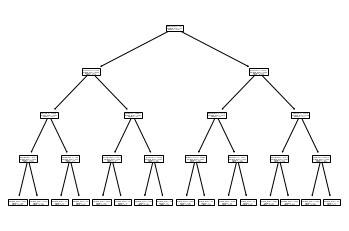

In [13]:
#7 y 8
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import plot_tree
import sklearn.preprocessing

model_tree_regresor = DecisionTreeRegressor(max_depth=4, random_state=44)

model_tree_regresor .fit(X_train, y_train)

plot_tree(model_tree_regresor , feature_names=X.columns)
plt.savefig('DesicionTreeRegresor.pdf')


In [14]:
#9
matrix = confusion_matrix(y_test, y_pred)

print("Desicion Tree Classifier: ", matrix)

Desicion Tree Classifier:  [[367  18   0]
 [ 10  38   0]
 [  0   3   2]]


In [15]:

#10 y 8
y_predTraining = model_tree_regresor.predict(X_train)
print ("MSE Desicion Tree Regressor Training:",metrics.mean_squared_error(y_train, y_predTraining))
y_pred = model_tree_regresor.predict(X_test)
print ("MSE Desicion Tree Regressor Test:",metrics.mean_squared_error(y_test, y_pred))

MSE Desicion Tree Regressor Training: 0.026951980040471175
MSE Desicion Tree Regressor Test: 0.06332036301879926


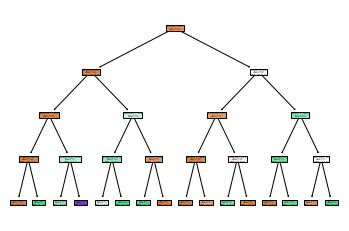

Accuracy Forest Classifier: 0.9429223744292238
Precision Forest Classifier: 0.9286537383148773
Recall Forest Clasiffier:  0.9429223744292238
Random Forest Classifier:  [[382   3   0]
 [ 17  31   0]
 [  0   5   0]]


C:\Users\Oscar Paredez\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


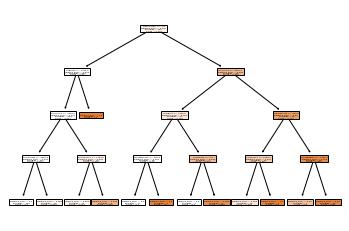

MSE Forest Regressor Training: 0.020507664150606036
MSE Forest Regressor Test: 0.04318750927175079


<Figure size 432x288 with 0 Axes>

In [16]:
#11
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import plot_tree
import sklearn.preprocessing

model_forest_classifier = RandomForestClassifier(max_depth=4, n_estimators=100)
model_forest_classifier.fit(X_train, y_train)
plot_tree(model_forest_classifier.estimators_[0], feature_names=X.columns, filled=True)
plt.show()
plt.savefig('forestClassifier.pdf')

y_pred = model_forest_classifier.predict(X_test)
print("Accuracy Forest Classifier:", metrics.accuracy_score(y_test, y_pred))
print("Precision Forest Classifier:", metrics.precision_score(
    y_test, y_pred, average='weighted'))
print("Recall Forest Clasiffier: ", metrics.recall_score(y_test, y_pred, average='weighted'))

matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Classifier: ", matrix)

model_forest_regressor = RandomForestRegressor(max_depth=4, n_estimators=100)
model_forest_regressor.fit(X_train, y_train)

plot_tree(model_forest_regressor.estimators_[0], feature_names=X.columns, filled=True)
plt.show()
plt.savefig('forestRegressor.pdf')
y_predTraining = model_forest_regressor.predict(X_train)
print ("MSE Forest Regressor Training:",metrics.mean_squared_error(y_train, y_predTraining))
y_pred = model_forest_regressor.predict(X_test)
print ("MSE Forest Regressor Test:",metrics.mean_squared_error(y_test, y_pred))

In [17]:
#######################################################################################

Mean Squared Error: 1912055685.17
R squared: 0.64


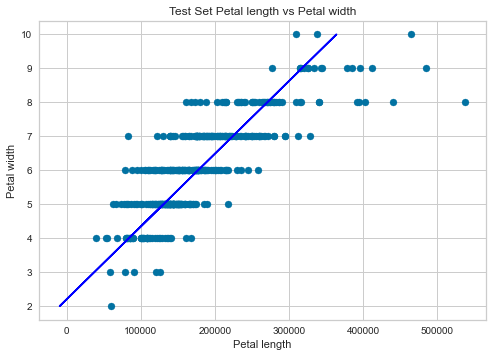

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


######## 2

df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)

Y = df.pop('SalePrice')  #La variable respuesta
X = df #El resto de los datos

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, train_size=0.7)

p_length = y_train.values.reshape(-1,1)

p_length_t = y_test.values.reshape(-1,1)
p_width = X_train['OverallQual'].values.reshape(-1,1)
p_width_t = X_test['OverallQual'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(p_width, p_length)
p_length_pred = lm.predict(p_width_t)


fig = plt.figure()
plt.scatter(p_length_t,p_width_t)
plt.plot(p_length_pred, p_width_t, color="blue")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Test Set Petal length vs Petal width")

print("Mean Squared Error: %.2f"%mean_squared_error(p_length_t,p_length_pred))
print("R squared: %.2f"%r2_score(p_length_t,p_length_pred))

In [32]:
########################################## 3

from sklearn.linear_model import LinearRegression 
df = pd.read_csv('train.csv', encoding='cp1252')
df.replace(to_replace=[np.nan, "NA"], value=0, inplace=True)
def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})


In [33]:
calculate_vif(df=df, features=['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual'])

,VIF,Tolerance
SalePrice,3.653925,0.273678
GrLivArea,2.053365,0.487005
LotArea,1.126781,0.887484
OverallQual,2.781147,0.359564


Text(0, 0.5, 'Residuales')

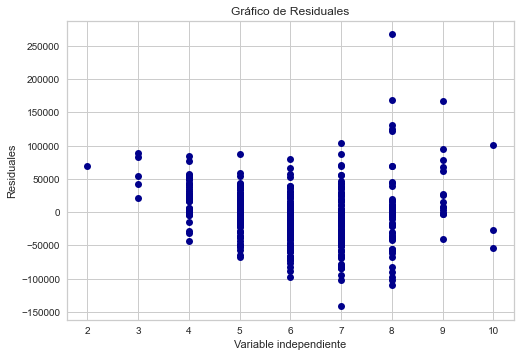

In [34]:
#################### 4

from scipy.stats import normaltest

residuales = p_length_t - p_length_pred

plt.plot(p_width_t,residuales, 'o', color='darkblue')
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

C:\Users\Oscar Paredez\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuales')

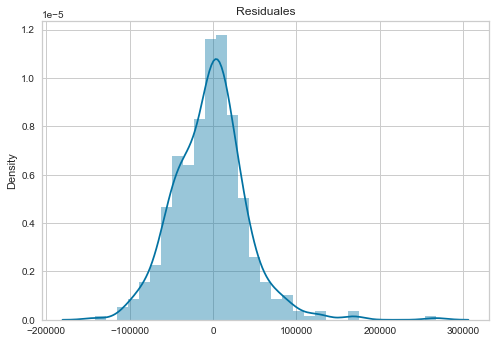

In [35]:
sns.distplot(residuales)
plt.title("Residuales")

Not normal distribution


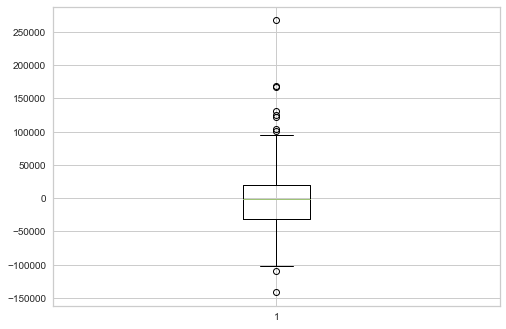

In [36]:
plt.boxplot(residuales)

z, pval = normaltest(residuales)

if(pval < 0.05):
    print("Not normal distribution")

0.6377613784497509

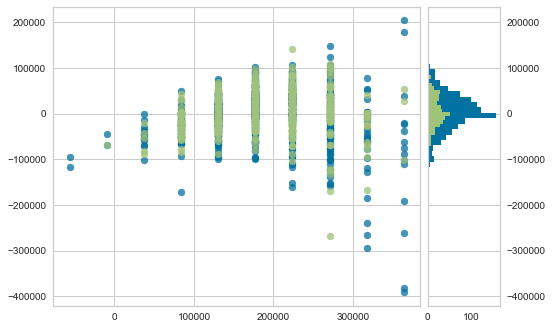

In [37]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(p_width,p_length)
visualizer.score(p_width_t,p_length_t)